<a href="https://colab.research.google.com/github/SvetlanaZap/SvetlanaZap.github.io/blob/master/Project1_Bike_sharing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing dataset


In [3]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import sklearn.linear_model as linear_module

In [77]:
#@title Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2021-06-04 01:03:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip.1’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.04MB/s    in 0.3s    

2021-06-04 01:03:03 (1.04 MB/s) - ‘Bike-Sharing-Dataset.zip.1’ saved [279992/279992]



In [78]:
#@title
!unzip Bike-Sharing-Dataset.zip

Archive:  Bike-Sharing-Dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace day.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace hour.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
#@title The description of the data.
!cat Readme.txt

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [4]:
df = pd.read_csv('hour.csv')
df = df.set_index('instant', drop = True)
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [5]:
df.shape

(17379, 16)

In [6]:
day_df = pd.read_csv('day.csv')
day_df = day_df.set_index('instant', drop = True)
day_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


In [8]:
#df[df['column_name'].isna()]
day_df[day_df['registered'].isna()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,


In [9]:
#df.isnull().values.any()
day_df.isnull().values.any()

False

In [10]:
day_df.isna().values.any()

False

In [11]:
day_df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

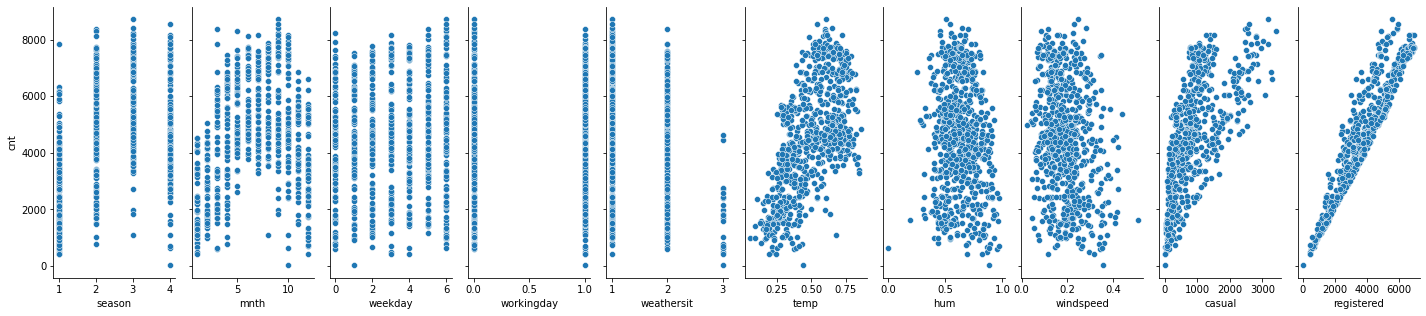

In [12]:
g = sns.pairplot(day_df,y_vars= 'cnt', x_vars= ['season', 'mnth', 'weekday', 'workingday', 'weathersit', 
                                            'temp', 'hum', 'windspeed', 'casual', 'registered'])
g.fig.set_figheight(5)
g.fig.set_figwidth(20)

In [13]:
exists = 4 in day_df.weathersit
print(exists)

True


In [14]:
day_df.weathersit.unique()

array([2, 1, 3])

In [15]:
day_df['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [16]:
#cnt vs. temp
X = day_df[['temp']]
Y = day_df[['cnt']]
model = linear_module.LinearRegression()
reg = model.fit(X, Y)
print('inretcept', reg.intercept_)
print('slope', reg.coef_)

inretcept [1214.64211903]
slope [[6640.70999855]]


In [17]:
reg.coef_.squeeze()

array(6640.70999855)

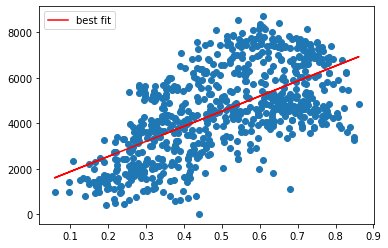

In [18]:
plt.pyplot.scatter(day_df.temp, day_df.cnt)
plt.pyplot.plot(day_df.temp, day_df.temp*reg.coef_.squeeze() + reg.intercept_.squeeze() , color = 'red', label='best fit')
plt.pyplot.legend()

In [19]:
#prediction
from sklearn.model_selection import train_test_split
# Split X and Y into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape) 
print('y_test shape: ',y_test.shape)

X_train shape:  (548, 1)
y_train shape:  (548, 1)
X_test shape:  (183, 1)
y_test shape:  (183, 1)


In [20]:
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

In [21]:
#training error
y_train_predict = reg.predict(X_train)


In [22]:
df_train_comparison = pd.DataFrame({'y_train' : y_train.cnt.values, 'predicted' : y_train_predict.flatten() })
df_train_comparison

,y_train,predicted
0,7001,4828.855770
1,4758,5570.879865
2,6691,5264.391652
3,7393,5533.243112
4,3867,4587.826987
...,...,...
543,3510,4022.307841
544,3786,3678.182875
545,2046,3437.618664
546,5130,5683.796575


In [23]:
from sklearn.metrics import mean_squared_error
import math

regression_train_mse = mean_squared_error(y_train_predict, y_train)
print('Temp training error',' ',math.sqrt(regression_train_mse))

Temp training error   1528.0892824366624


In [24]:
#Test error
y_predict = reg.predict(X_test)

In [25]:
df_comparison = pd.DataFrame({'y_test' : y_test.cnt.values, 'predicted' : y_predict.flatten() })
df_comparison

,y_test,predicted
0,3830,3049.075491
1,2114,2979.176821
2,3915,6554.868338
3,4322,3705.069957
4,6591,5791.338450
...,...,...
178,5336,6070.939581
179,2311,2414.593270
180,1162,2453.694714
181,1536,3274.908911


In [26]:
regression_test_mse = mean_squared_error(y_predict, y_test)
print('Temp test error',' ',math.sqrt(regression_test_mse))

Temp test error   1446.3396578458685


In [27]:
from sklearn.metrics import r2_score
r2_score(y_train,  y_train_predict.flatten())

0.3583530742348493

In [105]:
r2_score(y_test, y_predict)

0.4664634368801043

In [106]:
#Two variable regression


In [28]:
#cnt vs. temp and hum
Y = df[['cnt']]
X = df[['temp', 'hum']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [29]:
# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [184.57320547]
slope [[ 359.73792139 -278.27245192]]


In [30]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
print(regression_train_rse)

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)


155.88182828393766


0.2510949363606425

In [31]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

print(regression_test_rse)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)


160.1956579711852


0.2506158503791893

In [32]:
#cnt vs. weekday and registered
Y = day_df[['cnt']]
X = day_df[['weekday', 'registered']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# training
import sklearn.linear_model as linear_module
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [228.02382944]
slope [[10.53785593  1.1680882 ]]


In [33]:
# training error
y_train_predict = reg.predict(X_train)

from sklearn.metrics import mean_squared_error
import math

regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
print(regression_train_rse)

from sklearn.metrics import r2_score
r2_score(y_train, y_train_predict)

638.719852269939


0.8878964184174524

In [34]:
# test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
print(regression_test_rse)

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

604.6116754304829


0.9067654977201628

In [116]:
# one-hot encoding for weathr


In [35]:
day1_df = day_df.replace({
    'weathersit': {
        1: 'Clear',
        2: 'Mist',
        3: 'Light Rain',
        4: 'Heavy Rain'}
    })
day1_df.head()


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [36]:
day1_df.weathersit.unique()

array(['Mist', 'Clear', 'Light Rain'], dtype=object)

In [37]:
weather_list = list(day1_df.weathersit.unique())
weather_list

['Mist', 'Clear', 'Light Rain']

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
enc = preprocessing.OneHotEncoder(categories=[weather_list])
enc

OneHotEncoder(categories=[['Mist', 'Clear', 'Light Rain']])

In [39]:
x = [['Mist'], ['Clear'], ['Light Rain']]
enc.fit(x)
enc.transform(day1_df.weathersit.values.reshape(-1,1))

<731x3 sparse matrix of type '<class 'numpy.float64'>'
	with 731 stored elements in Compressed Sparse Row format>

In [40]:
pd.DataFrame.sparse.from_spmatrix(enc.transform(day1_df.weathersit.values.reshape(-1,1)))

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
726,1.0,0.0,0.0
727,1.0,0.0,0.0
728,1.0,0.0,0.0
729,0.0,1.0,0.0


In [41]:
Y = day1_df[['cnt']]
X_enc = enc.transform(day1_df.weathersit.values.reshape(-1,1))

X_enc_train, X_enc_test, y_train, y_test = train_test_split(X_enc, Y, test_size=0.25, random_state=1)

# training
model = linear_module.LinearRegression()
reg = model.fit(X_enc_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [3675.07271802]
slope [[  494.88308309  1306.30728198 -1801.19036507]]


In [42]:
y_train_predict = reg.predict(X_enc_train)
regression_test_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

r2_score(y_train, y_train_predict)

0.10558442817885194

In [47]:
####
# Y = day1_df[['cnt']]
# X = enc.transform(day1_df.weathersit.values.reshape(-1,1))
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [43]:
#training
model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)


intercept [228.02382944]
slope [[10.53785593  1.1680882 ]]


In [44]:
#training error
y_train_predict = reg.predict(X_train)
regression_train_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))
r2_score_training = r2_score(y_train, y_train_predict)
r2_score_training

0.8878964184174524

In [45]:
#test error
y_predict = reg.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_test=r2_score(y_test, y_predict)
r2_score_test

0.9067654977201628

In [46]:
#one-hot encoding for weekday
day_df.weekday.nunique()

7

In [47]:
day2_df = day1_df.replace({
    'weekday': {
        6: 'Sunday',
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday'}
    })

In [48]:
day2_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,Sunday,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,Monday,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,Tuesday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,Wednesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,Thursday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
day2_df.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [50]:
weekday_list = list(day2_df.weekday.unique())
weekday_list

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [51]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
enc = preprocessing.OneHotEncoder(categories=[weekday_list])
enc

OneHotEncoder(categories=[['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                           'Thursday', 'Friday', 'Saturday']])

In [52]:
x = [['Sunday'], ['Monday'], ['Tuesday'], ['Wednesday'],
                         ['Thursday'], ['Friday'], ['Saturday']]
enc.fit(x)
enc.transform(day2_df.weekday.values.reshape(-1,1))


<731x7 sparse matrix of type '<class 'numpy.float64'>'
	with 731 stored elements in Compressed Sparse Row format>

In [53]:
pd.DataFrame.sparse.from_spmatrix(enc.transform(day2_df.weekday.values.reshape(-1,1)))

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
726,0.0,0.0,0.0,0.0,0.0,1.0,0.0
727,0.0,0.0,0.0,0.0,0.0,0.0,1.0
728,1.0,0.0,0.0,0.0,0.0,0.0,0.0
729,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
Y = day2_df[['cnt']]
X_enc = enc.transform(day2_df.weekday.values.reshape(-1,1))

X_enc_train, X_enc_test, y_train, y_test = train_test_split(X_enc, Y, test_size=0.25, random_state=1)

# training
model = linear_module.LinearRegression()
reg = model.fit(X_enc_train, y_train)
print("intercept", reg.intercept_)
print("slope", reg.coef_)

intercept [4625.01617624]
slope [[ 118.66383386 -239.20665285 -150.79524983  -51.42641743   24.8463078
   129.116178    168.80200046]]


In [55]:
y_train_predict = reg.predict(X_enc_train)
regression_test_rse = math.sqrt(mean_squared_error(y_train_predict, y_train))

r2_score(y_train, y_train_predict)

0.005699361020349847

In [56]:
#test
y_predict = reg.predict(X_enc_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))
r2_score_test=r2_score(y_test, y_predict)
r2_score_test

-0.046411662811659316

In [57]:
#Ridge Regression
day2_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [58]:
from sklearn.linear_model import Ridge
Y = df[['cnt']]
X = df[['season', 'weekday','weathersit', 'temp', 'hum',
       'windspeed', 'registered']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


regressor = Ridge(alpha=0.5)
regressor.fit(X_train,y_train)
y_predict = regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

0.9568697233014116

In [59]:
reg.intercept_

array([4625.01617624])

In [60]:
reg.coef_

array([[ 118.66383386, -239.20665285, -150.79524983,  -51.42641743,
          24.8463078 ,  129.116178  ,  168.80200046]])

In [61]:
#Ridge and Cross-Validation with multiple alphas
from sklearn.linear_model import RidgeCV

Y = df[['cnt']]
X = df[['season', 'weekday','weathersit', 'temp', 'hum',
       'windspeed', 'registered']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


ridge_regressor = RidgeCV(cv=5, alphas = [0.01,0.1, 0.5])
ridge_regressor.fit(X_train,y_train)
y_predict = ridge_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

0.9568684891716982

In [62]:
ridge_regressor.alpha_

0.1

In [63]:
#Lasso Regression
from sklearn.linear_model import LassoCV
lasso_regressor = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 50, 100, 1000 ])
lasso_regressor.fit(X_train,y_train)
y_predict = lasso_regressor.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

r2_score(y_test, y_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9568761339945447

In [64]:
lasso_regressor.alpha_

0.01

In [65]:
lasso_regressor.coef_

array([ -0.19520238,   0.33359009,   1.82934338,  86.75346872,
       -62.12339042,  -0.64023752,   1.10931703])

In [152]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.22.2.post1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, joblib, scipy
Required-by: yellowbrick, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn


In [66]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = preprocessing.MinMaxScaler()
Y = df[['cnt']]
X_unscaled = df[['season', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']]

X = min_max_scaler.fit_transform(X_unscaled)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [154]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [155]:
# If scikit version is lower then 0.24
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3MB 1.4MB/s 


In [67]:
from sklearn.feature_selection import SequentialFeatureSelector
from time import time

model = linear_module.LinearRegression()
reg = model.fit(X_train, y_train)

tic_fwd = time()
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=2,
                                        direction='forward').fit(X_train, y_train)
toc_fwd = time()

tic_bwd = time()
sfs_backward = SequentialFeatureSelector(reg,
                                         direction='backward').fit(X_train, y_train)
toc_bwd = time()

sfs_forward.get_support()
toc_fwd = time()
print(toc_fwd)
print(tic_bwd)

1622769165.1849787
1622769164.3383906


In [68]:
X_unscaled.columns[sfs_forward.get_support()]

Index(['temp', 'hum'], dtype='object')

In [69]:
sfs_forward.get_params()

{'cv': 5,
 'direction': 'forward',
 'estimator': LinearRegression(),
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator__positive': False,
 'n_features_to_select': 2,
 'n_jobs': None,
 'scoring': None}

In [70]:
X_train[0:5]

array([[1.        , 1.        , 0.16666667, 1.        , 0.33333333,
        0.32653061, 0.93      , 0.        ],
       [0.66666667, 0.54545455, 0.83333333, 1.        , 0.        ,
        0.63265306, 0.65      , 0.12284001],
       [0.33333333, 0.45454545, 0.66666667, 1.        , 0.33333333,
        0.71428571, 0.84      , 0.12284001],
       [0.66666667, 0.72727273, 0.66666667, 1.        , 0.        ,
        0.63265306, 0.65      , 0.15786999],
       [1.        , 0.90909091, 0.5       , 1.        , 0.33333333,
        0.44897959, 0.94      , 0.12284001]])

In [71]:
y_predict = sfs_backward.estimator.predict(X_test)
regression_test_rse = math.sqrt(mean_squared_error(y_predict, y_test))

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.26563255885748227